In [42]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (assuming it's in the same format as the uploaded file)
data = pd.read_excel('S-FFC copy.xlsx')

# Parsing the diameter intervals and converting them into numerical form
diameter_intervals = data['diameter'].str.split('-', expand=True).astype(float)
diameter_intervals.columns = ['lower_bound', 'upper_bound']
data = pd.concat([data, diameter_intervals], axis=1)



In [112]:
# Function to estimate log-normal parameters and generate particles
def generate_log_normal_particles(lower_bound, upper_bound, percentage, total_particles):
    # Estimating mean and standard deviation for log-normal distribution
    mean = np.log((lower_bound + upper_bound) / 2)
    sigma = 0.2  # This is a somewhat arbitrary choice, can be adjusted

    # Calculate number of particles for this interval
    num_particles_in_interval = int(total_particles * percentage / 100)

    # Generate particles following the log-normal distribution
    return np.random.lognormal(mean, sigma, num_particles_in_interval)

# Define the total number of particles for the simulation
total_particles = 1000000



In [113]:
# Generate the particles for each interval using the log-normal distribution
simulated_particles = np.concatenate([
    generate_log_normal_particles(row['lower_bound'], row['upper_bound'], row['diff_percent'], total_particles)
    for index, row in data.iterrows()
])



In [114]:
len(simulated_particles)

1000105

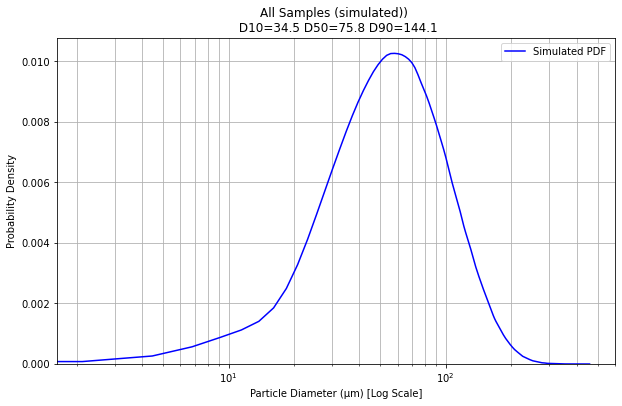

In [182]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(simulated_particles, color='blue', label='Simulated PDF')
# plt.hist(simulated_particles)
plt.xscale('log')  # Logarithmic scale for the x-axis


D10 = np.percentile(simulated_particles,10)
D50 = np.percentile(simulated_particles,50)
D90 = np.percentile(simulated_particles,90)

plt.title('All Samples (simulated)) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


In [116]:
print()
print(np.percentile(simulated_particles,50))
print(np.percentile(simulated_particles,90))

34.54261245348289
75.7626459632954
144.12868363501585


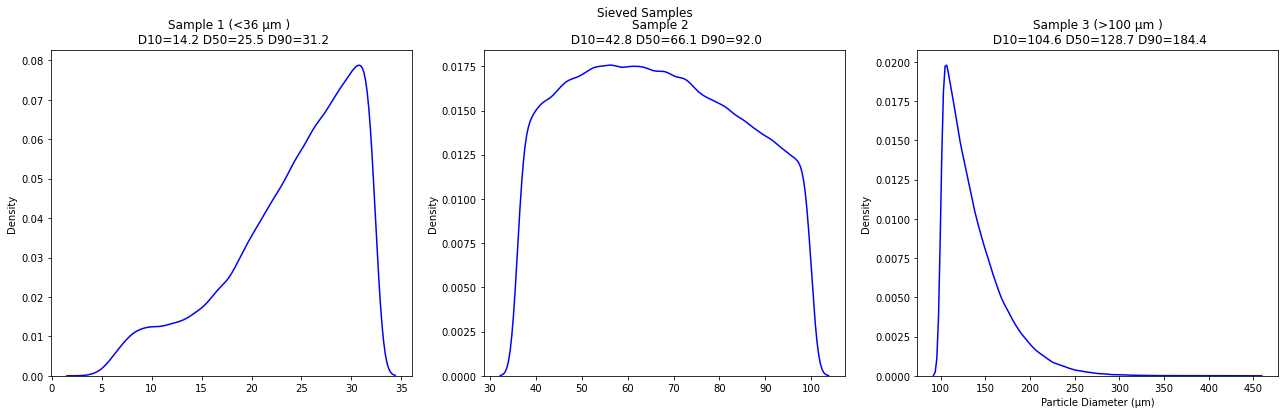

In [246]:

T1 = 36
T2 = 100
sample1 = simulated_particles[simulated_particles<(T1-T1*0.1) ]
sample2 = simulated_particles[(simulated_particles>T1) & (simulated_particles<T2)]
sample3 = simulated_particles[ simulated_particles>T2]



fig, axs = plt.subplots(1, 3, figsize=(22, 6))  # 3 rows, 1 column
plt.suptitle('Sieved Samples')

# Plotting the probability density function (PDF) for the simulated particles
sns.kdeplot(sample1, color='blue', label='Simulated PDF',ax=axs[0])
D10 = np.percentile(sample1,10)
D50 = np.percentile(sample1,50)
D90 = np.percentile(sample1,90)
axs[0].set_title('Sample 1 (<{} µm ) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(T1,D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')



sns.kdeplot(sample2, color='blue', label='Simulated PDF',ax=axs[1])
D10 = np.percentile(sample2,10)
D50 = np.percentile(sample2,50)
D90 = np.percentile(sample2,90)
axs[1].set_title('Sample 2  \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')




sns.kdeplot(sample3, color='blue', label='Simulated PDF',ax=axs[2])
D10 = np.percentile(sample3,10)
D50 = np.percentile(sample3,50)
D90 = np.percentile(sample3,90)
axs[2].set_title('Sample 3 (>{} µm )\n D10={:.1f} D50={:.1f} D90={:.1f}'.format(T2,D10,D50,D90))
plt.xlabel('Particle Diameter (µm)')





plt.show()


array([21.7432065 , 14.44285962, 15.37529602, ..., 19.58018071,
       22.82803497, 19.09094355])

array([  5.64981492,  22.6896874 ,  20.02368597, ..., 205.26971857,
       153.580897  , 136.93853797])

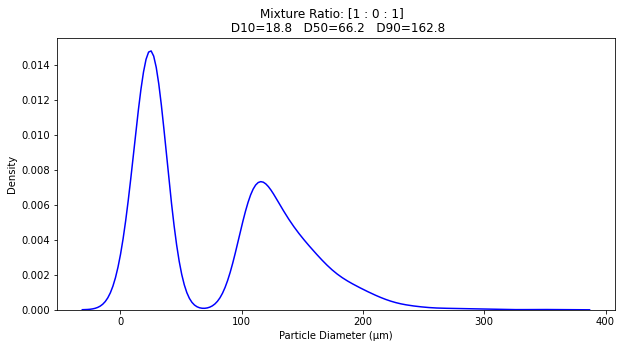

In [270]:
r1,r2,r3 = 1,0,1
m1 = np.random.choice(sample1,int(2000*r1))
m2 = np.random.choice(sample2,int(2000*r2))
m3 = np.random.choice(sample3,int(2000*r3))

mix = np.append(np.append(m1,m2),m3)

sns.kdeplot(mix, color='blue', label='Simulated PDF')
D10 = np.percentile(mix,10)
D50 = np.percentile(mix,50)
D90 = np.percentile(mix,90)
plt.title('Mixture Ratio: [{} : {} : {}]  \n D10={:.1f}   D50={:.1f}   D90={:.1f}'.format(r1,r2,r3,D10,D50,D90))
plt.xlabel('Particle Diameter (µm)')

plt.gcf().set_size_inches(10,5)


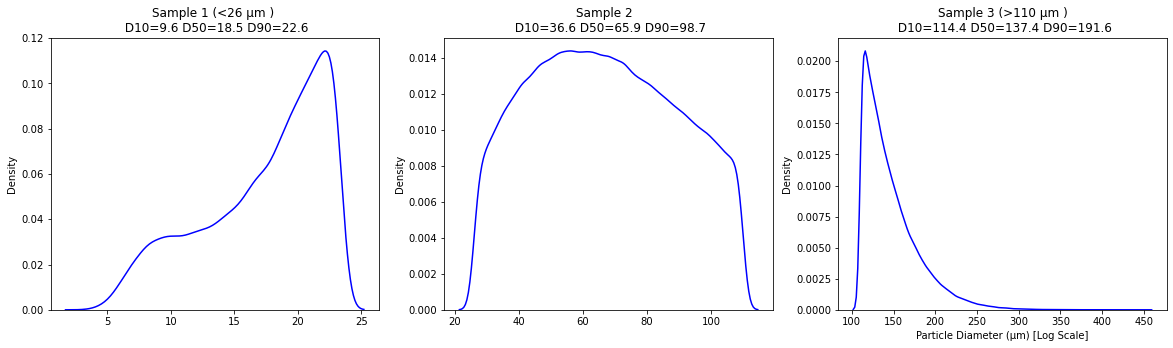

In [183]:

T1 = 26
T2 = 110
sample1 = simulated_particles[simulated_particles<(T1-T1*0.1) ]
sample2 = simulated_particles[(simulated_particles>T1) & (simulated_particles<T2)]
sample3 = simulated_particles[ simulated_particles>T2]



fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 3 rows, 1 column


# Plotting the probability density function (PDF) for the simulated particles
sns.kdeplot(sample1, color='blue', label='Simulated PDF',ax=axs[0])
D10 = np.percentile(sample1,10)
D50 = np.percentile(sample1,50)
D90 = np.percentile(sample1,90)
axs[0].set_title('Sample 1 (<{} µm ) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(T1,D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')



sns.kdeplot(sample2, color='blue', label='Simulated PDF',ax=axs[1])
D10 = np.percentile(sample2,10)
D50 = np.percentile(sample2,50)
D90 = np.percentile(sample2,90)
axs[1].set_title('Sample 2  \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')




sns.kdeplot(sample3, color='blue', label='Simulated PDF',ax=axs[2])
D10 = np.percentile(sample3,10)
D50 = np.percentile(sample3,50)
D90 = np.percentile(sample3,90)
axs[2].set_title('Sample 3 (>{} µm )\n D10={:.1f} D50={:.1f} D90={:.1f}'.format(T2,D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')



plt.show()


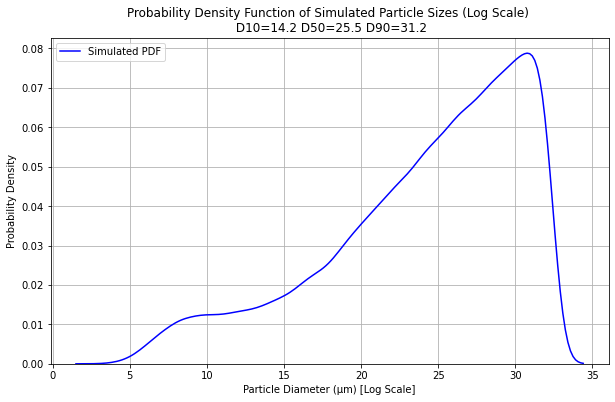

In [149]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(sample1, color='blue', label='Simulated PDF')

# plt.hist(simulated_particles)
#plt.xscale('log')  # Logarithmic scale for the x-axis

D10 = np.percentile(sample1,10)
D50 = np.percentile(sample1,50)
D90 = np.percentile(sample1,90)
plt.title('Probability Density Function of Simulated Particle Sizes (Log Scale) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


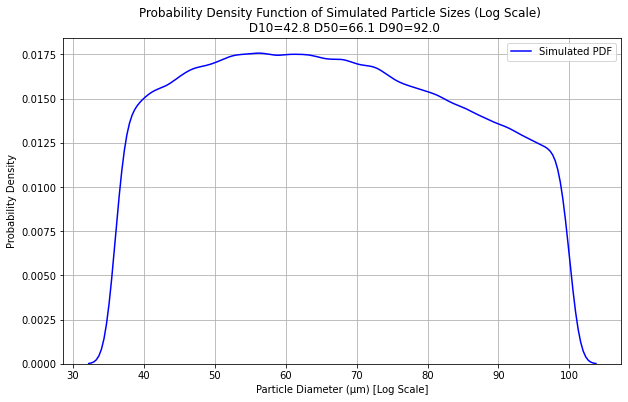

In [154]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(sample2, color='blue', label='Simulated PDF')

# plt.hist(simulated_particles)
#plt.xscale('log')  # Logarithmic scale for the x-axis

D10 = np.percentile(sample2,10)
D50 = np.percentile(sample2,50)
D90 = np.percentile(sample2,90)
plt.title('Probability Density Function of Simulated Particle Sizes (Log Scale) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


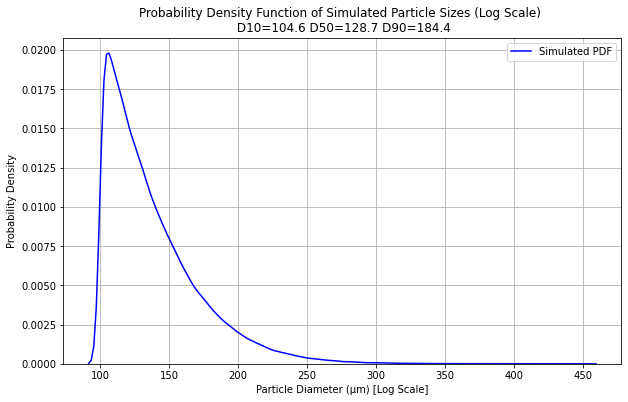

In [153]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(sample3, color='blue', label='Simulated PDF')

# plt.hist(simulated_particles)
#plt.xscale('log')  # Logarithmic scale for the x-axis

D10 = np.percentile(sample3,10)
D50 = np.percentile(sample3,50)
D90 = np.percentile(sample3,90)
plt.title('Probability Density Function of Simulated Particle Sizes (Log Scale) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()
